In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils

from utils import local_data
from utils import window
from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df_series = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

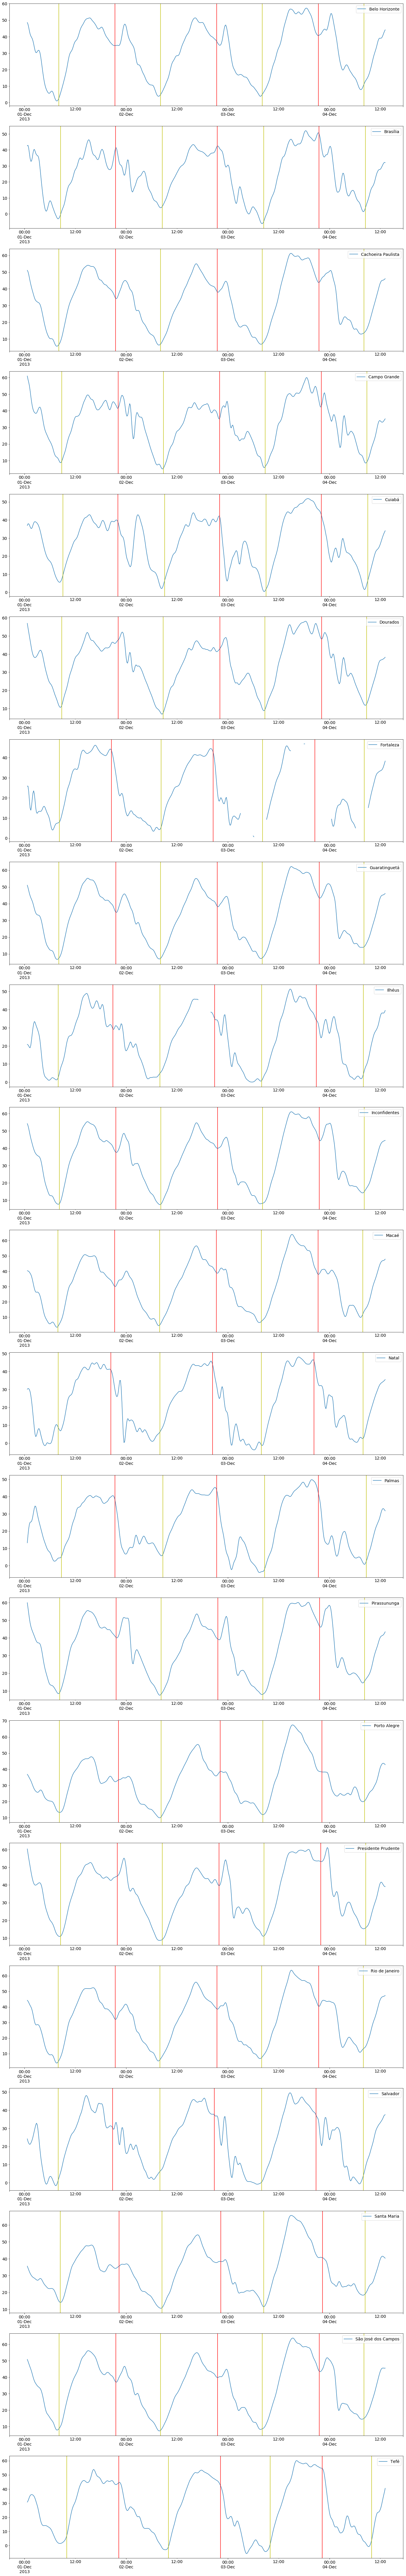

In [3]:
a = 0
b = 512

size = df_series.columns.size
fig, ax = plt.subplots(size, 1)
for idx, i in enumerate(df_series.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series[i][a:b].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")
    
    lat, long = location_station(i)
    set_of_sunrise = find_set_sunrise(df_series[a:b], lat, long)
    set_of_sunset = find_set_sunset(df_series[a:b], lat, long)
    for i in set_of_sunrise:
        ax[idx].axvline(x=i, color='y')
    for i in set_of_sunset[0:-1]:
        ax[idx].axvline(x=i, color='r')

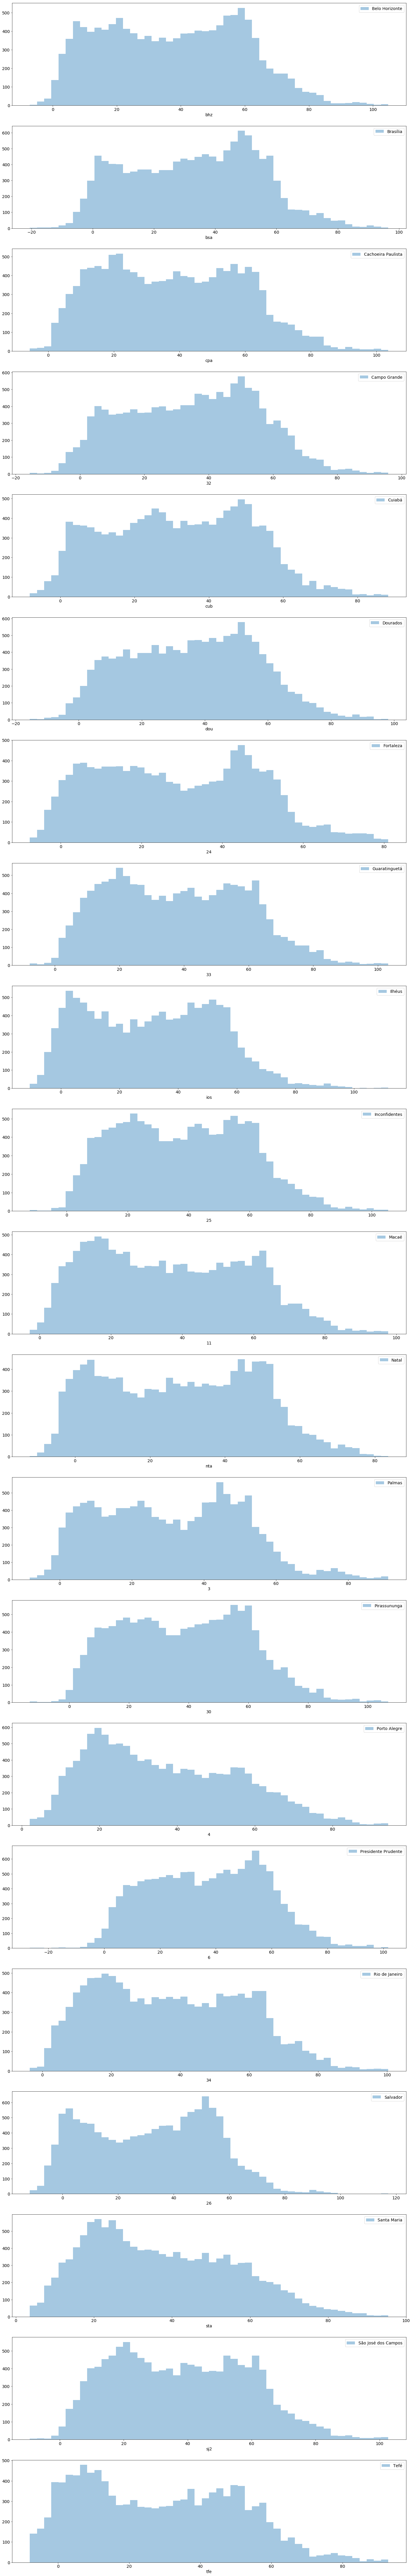

In [4]:
size = df_series.columns.size
fig, ax = plt.subplots(size, 1, figsize=(24, 160))
for idx, i in enumerate(df_series.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    sns.distplot(df_series[i].dropna(), kde=False, ax=ax[idx], label=name, bins=50)
    ax[idx].legend(loc="upper right")